In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.plotting as plt2
import seaborn as sns
## Performing Regression
import scipy.stats as stats
import statsmodels.formula.api as sm

In [2]:
pwd()

'/Users/nimisha/Downloads/Ds Simplilearn data'

In [3]:
hp = pd.read_csv("Datasets/Regression_House_Prices.csv")

In [4]:
hp.head(5)

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


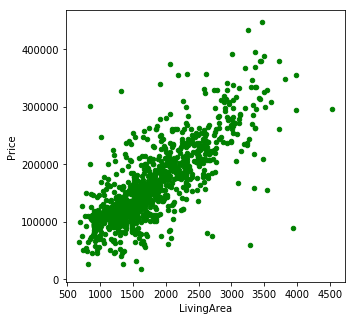

In [5]:
hp.plot(kind="scatter",
         x = "LivingArea",
         y = "Price",
         figsize = (5,5),
         color = "green")

In [6]:
## v1.corr(v2)
cor = hp.Price.corr(hp.LivingArea)
cor

0.7763964501037219

In [7]:
corr_coef = hp.corr()
corr_coef ## corelation Matrix

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
Price,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
LivingArea,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Bathrooms,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Bedrooms,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
LotSize,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Age,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Fireplace,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


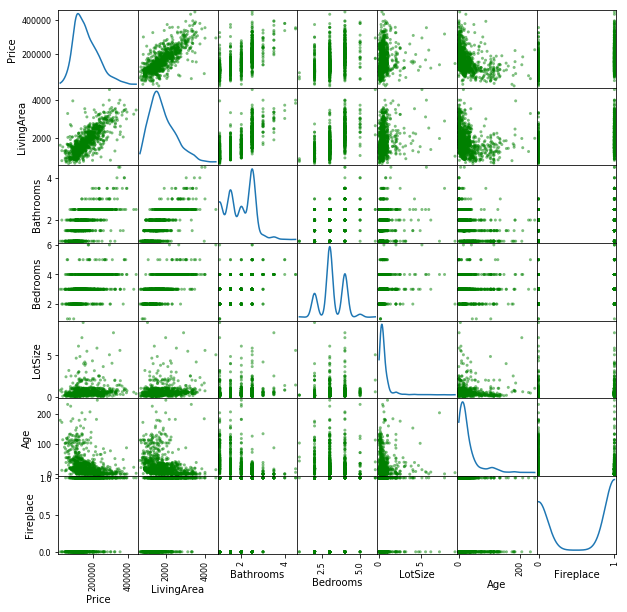

In [10]:
plt2.scatter_matrix(hp,figsize = (10,10),color = 'green', diagonal = 'kde')
plt.show()
#plt.savefig("/Users/nimisha/OneDrive/Data science with python/Python DP/DS_classes/Datasets/scatter_matrix.png")

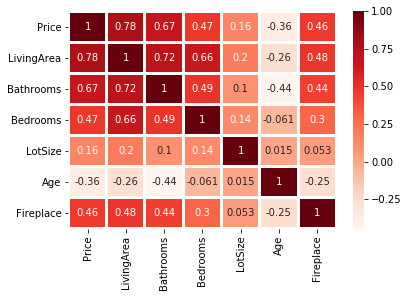

In [9]:
sns.heatmap(corr_coef, cmap = "Reds",annot = True,linewidth= 2,linecolor = "w",cbar=True,square=False)
#plt.savefig('/Users/nimisha/OneDrive/Data science with python/Python DP/DS_classes/Datasets/sns.png')

In [13]:
hp.head()

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0


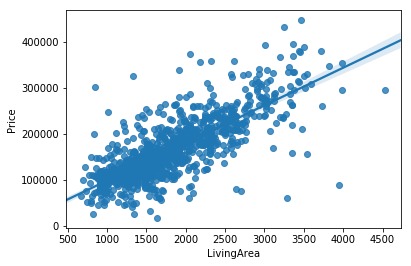

In [14]:
sns.regplot(x="LivingArea", y="Price", data=hp)

In [15]:
# creating model object
model = sm.ols(formula='Price ~ LivingArea', data = hp)

# fitting the model
model_fit = model.fit()

# summary of the model
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     1586.
Date:                Sat, 16 Feb 2019   Prob (F-statistic):          9.75e-212
Time:                        21:06:23   Log-Likelihood:                -12647.
No. Observations:                1047   AIC:                         2.530e+04
Df Residuals:                    1045   BIC:                         2.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.588e+04   3943.034      4.026      0.000    8138.471    2.36e+04
LivingArea    81.8825      2.056     39.823      0.000      77.848      85.917
==============================================================================
Omnibus:                      119.620   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              827.749
Skew:                           0.245   Prob(JB):                    1.81e-180
Kurtosis:                       7.328   Cond. No.                     5.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Akaike information criteria --- a relative measure for evaluation of models

#### AIC = 2k - 2ln(L)
##### k = no.parameters
##### L = likelihood function


#### Bayesian infromation criteria 
#### BIC = ln(n)(k) - 2ln(L)

#### penalize for model complexity --- adding variables --- overfitting --- lower the value better model

In [1]:
features = ' + '.join(hp.drop('Price',axis = 1).columns)
features

NameError: name 'hp' is not defined

In [11]:
# creating model object
model_m = sm.ols(formula='Price ~ ' + features, data = hp)

# fitting the model
model_fit_m = model_m.fit()

# summary of the model
model_fit_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     317.4
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          5.39e-231
Time:                        06:35:53   Log-Likelihood:                -12585.
No. Observations:                1047   AIC:                         2.518e+04
Df Residuals:                    1040   BIC:                         2.522e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.73e+04   6087.742      4.485      0.000    1.54e+04    3.92e+04
LivingArea    66.6717      3.421     19.487      0.000      59.958      73.385
Bathrooms   1.651e+04   3074.540      5.371      0.000    1.05e+04    2.25e+04
Bedrooms   -5171.5273   2261.754     -2.287      0.022   -9609.648    -733.407
LotSize     1633.3172   1642.520      0.994      0.320   -1589.713    4856.347
Age         -218.6110     40.902     -5.345      0.000    -298.870    -138.352
Fireplace   1.021e+04   2947.058      3.463      0.001    4424.071     1.6e+04
==============================================================================
Omnibus:                      199.393   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              804.303
Skew:                           0.851   Prob(JB):                    2.23e-175
Kurtosis:                       6.942   Cond. No.                     9.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# creating model object
model_m = sm.ols(formula='Price ~ LivingArea + Bathrooms + Bedrooms  + Age + Fireplace', data = hp)

# fitting the model
model_fit_m = model_m.fit()

# summary of the model
model_fit_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     380.7
Date:                Wed, 06 Mar 2019   Prob (F-statistic):          4.30e-232
Time:                        06:46:33   Log-Likelihood:                -12586.
No. Observations:                1047   AIC:                         2.518e+04
Df Residuals:                    1041   BIC:                         2.521e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.747e+04   6085.494      4.514      0.000    1.55e+04    3.94e+04
LivingArea    67.2108      3.378     19.896      0.000      60.582      73.839
Bathrooms    1.64e+04   3072.540      5.338      0.000    1.04e+04    2.24e+04
Bedrooms   -5167.2597   2261.737     -2.285      0.023   -9605.343    -729.176
Age         -216.7178     40.857     -5.304      0.000    -296.889    -136.546
Fireplace    1.01e+04   2945.073      3.429      0.001    4320.860    1.59e+04
==============================================================================
Omnibus:                      199.519   Durbin-Watson:                   1.261
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              799.827
Skew:                           0.854   Prob(JB):                    2.09e-174
Kurtosis:                       6.927   Cond. No.                     9.78e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model_fit_m.rsquared_adj

0.6447587912357609

## Prediction for a single Independent variable value using coefficients

In [17]:
# ypred = beta0 + beta1 x1
#Price = b0 + b1*Living Area
b0=15880
b1 = 81.8825

price_pred = b0 +(b1* 1629)
price_pred

149266.5925

In [18]:
hp.LivingArea[0], hp.Price[0]

(1629, 16858)

In [19]:
hp.Price[6] - price_pred ## residual

-104393.5925

In [46]:
hp.Price.mean()

163862.12511938874

In [52]:
hp.Price[6]-hp.Price.mean()

-118989.12511938874

## Predicting for a set of values

In [19]:
pred = model_fit.predict(hp)

In [20]:
pred[0]

149262.24668737646

In [21]:
Y_pred = model_fit.predict(hp[["LivingArea"]])
Y_pred[0]

149262.24668737646

## Alternate Method

In [22]:
from sklearn import linear_model


reg_mod = linear_model.LinearRegression()

reg_mod.fit(X = hp,
            y = hp.Price) ## x as dataframe y as series

reg_mod

reg_mod.intercept_ , reg_mod.coef_

(15875.636989985855, array([81.88251056]))

In [23]:
y_pred = reg_mod.predict(hp[["LivingArea"]])

In [24]:
y_pred[0]

149262.24668737658

In [41]:
reg_mod

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Residual Analysis

In [20]:
residual = model_fit_m.resid # y - ycap

In [21]:
pred_value = model_fit_m.fittedvalues ## ycap

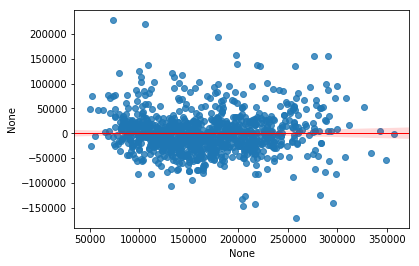

In [21]:
## Linearity assumption
## Residual Vs Predictor Plot
sns.regplot(model_fit_m.fittedvalues,residual,
           line_kws={'color': 'red', 'lw': 1})

In [49]:
hp.columns

Index(['Price', 'LivingArea', 'Bathrooms', 'Bedrooms', 'LotSize', 'Age',
       'Fireplace', 'c'],
      dtype='object')

In [22]:
## multicollinearity -- vif calculations
from statsmodels.stats.outliers_influence import variance_inflation_factor
## design matrix ---> formula based matrix
from patsy import dmatrices
y, X = dmatrices('Price ~ LivingArea + Bathrooms + Bedrooms  + Age + Fireplace', 
                 data = hp, return_type= 'dataframe')
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,Intercept,23.848408
1,LivingArea,3.020899
2,Bathrooms,2.501264
3,Bedrooms,1.852535
4,Age,1.308153
5,Fireplace,1.347931


In [28]:
## multicollinearity -- vif calculations
from statsmodels.stats.outliers_influence import variance_inflation_factor
## design matrix ---> formula based matrix
from patsy import dmatrices
y, X = dmatrices('Price ~  LivingArea   + Age + Fireplace', 
                 data = hp, return_type= 'dataframe')
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variable,VIF
0,Intercept,11.518273
1,LivingArea,1.339940
2,Age,1.097289
3,Fireplace,1.329429


In [31]:
model_m_fit = sm.ols(formula='Price ~ LivingArea   + Age + Fireplace ', 
                 data = hp).fit()
model_m_fit.rsquared

0.6356833245179454

In [38]:
# creating model object
model_m_fit = sm.ols(formula='Price ~  LivingArea + Age +Fireplace', 
                 data = hp).fit()
model_m_fit.rsquared

0.6356833245179454

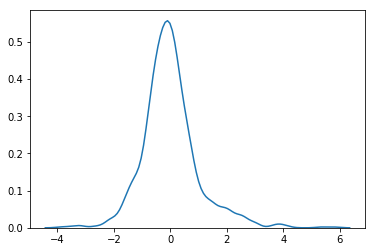

In [68]:
sns.distplot(model_fit_m.get_influence().resid_studentized_internal, hist= False)

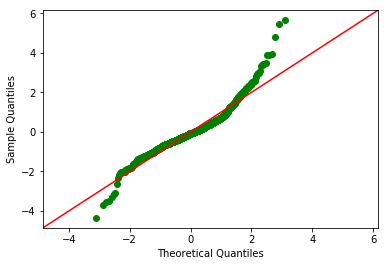

In [33]:
## QQ plot -- thereotical quantiles vs square root of standardized residuals
# normalized residuals -- standardised residuals
model_norm_residuals = model_fit_m.get_influence().resid_studentized_internal
from statsmodels.graphics.gofplots import ProbPlot
QQ = ProbPlot(model_norm_residuals)
plot_qq = QQ.qqplot( line = '45',color='g', lw=1)
plt.show()

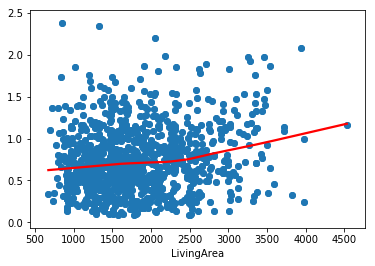

In [39]:
## scale location --- squareroot(normalized residuals) Vs  Fitted Values
## equal variance
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
plt.scatter(hp['LivingArea'],model_norm_residuals_abs_sqrt)
sns.regplot(hp['LivingArea'],model_norm_residuals_abs_sqrt, lowess=True,line_kws={'color':'red'})
plt.show()                              

In [40]:
influence = model_fit_m.get_influence()

In [41]:
influence.cooks_distance[0]

array([0.01494434, 0.00445172, 0.00141578, ..., 0.00795544, 0.03122465,
       0.0259368 ])

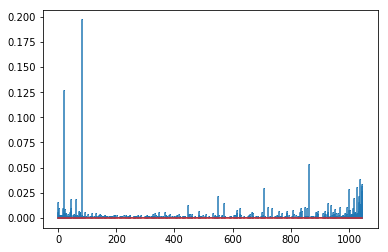

In [42]:
#c is the distance and p is p-value
c = influence.cooks_distance[0]
plt.stem(np.arange(len(c)), c,markerfmt = ',')
plt.show()

In [43]:
c

array([0.01494434, 0.00445172, 0.00141578, ..., 0.00795544, 0.03122465,
       0.0259368 ])

In [44]:
hp['c'],p=influence.cooks_distance

In [45]:
hp.sort_values(by ='c',ascending=False).head(10)

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace,c
82,88092,3944,1.0,4,1.64,185,1,0.196552
20,59003,3285,2.0,5,0.42,233,0,0.126399
862,226742,1989,2.0,3,1.00,247,1,0.052190
1038,373227,2058,1.5,2,0.23,49,1,0.038193
1043,391842,3003,3.5,4,0.46,88,1,0.032450
1045,432845,3250,2.5,3,0.53,23,1,0.031225
1028,338596,1908,3.5,4,0.24,17,1,0.029763
707,185318,1500,1.5,4,0.58,208,1,0.028803
1001,300931,847,1.0,2,0.55,78,0,0.028141
1046,446436,3467,2.5,4,0.34,3,1,0.025937


In [46]:
drp_indx = list(hp.sort_values(by ='c',ascending=False).head(4).index)

In [47]:
drp_indx

[82, 20, 862, 1038]

In [48]:
new_hp = hp.drop(drp_indx, axis = 0,inplace = False)